 <center><h1>Study of Toronto Neighborhoods suitable for Indian Restaurant.</h1></center

As a part of the final IBM Capstone Project, this is my opportunity to work on real life data and understand its properties to make a business decision. The learning outcome for our final project was to define a business problem and to use data science methodologies to understand the data and eventually make a business conclusion.We also had to scrape data from the web and use Foresquare API to extraction location details. In this project, we start with defining a problem, identifying the needed data to answer the problem, analyze data to study its properties and give a conclusion to answer the business question.

<h2>1. A description of the problem and a discussion of the background.</h2>

<h3>Possible locations for opening an Indian Restaurant in Toronto, Canada.</h3>

 Canada is one of the few countries in the world which takes pride in the ethnic diversity. People from all over the world immigrate to Canada every year and many of them settle down in Toronto, the capital of the province of Ontario, making it one of the most populated cities in Canada. Its diversity is reflected in Toronto’s ethnic neighborhoods such as Chinatown, Corso Italia, Greektown, Kensington Market, Koreatown, Little India, Little Italy, Little Jamaica, Little Portugal & Roncesvalles. With such diverse population and Indians being one of top 5 ethnic groups, it can be a great place to open up an Indian restaurant.
 
 There can be a number of factors in deciding whether it is a profitable idea to open up a restaurant. However in this project we will concentrate on two such factors i.e the population of Indian customers in the neighborhoods of Toronto and also analyze Toronto neighborhoods to study about already existing Indian restaurants in the area. To summarize our focus, we will study population and Indian restaurant distribution in the neighborhoods of Canada.

<h3>Target Audience</h3>

Who will be more interested in this project? What type of clients or a group of people would benefit?
 1.	Indian travellers and residents who want to visit Indian resturants in the neighborhoods of Toronto.
 2.	Business personnel who are planning to invest or freelancers who loves to have their own restaurant as a side business. This analysis will give an view of demographics before they decide to invest.
 3.	Students, Business Analysts or Data Scientists, who wish to practice Data Analysis concepts and other statistical & machine learning techniques..

<h2>2. Data Sources, Data Cleaning and its uses in solving the problem</h2

<h3>2.1 Data Sources and its use</h3>

a) We will need names of all neighborhoods, postal code and borough to segment our data by neighbourhood. I will be extracting this data from “List of Postal code of Canada: M” (https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M) wiki page. This page has the postal code, borough & the name of all the neighborhoods present in Toronto. 
 
b) We will need latitude and longitude for each of these neighborhoods to plot them on a map. I will be using “https://cocl.us/Geospatial_data” csv file,provided during this course to get all the geographical coordinates of the neighborhoods. 
 
c) Knowing the population of Indian residents in these neighborhoods will help us identify neighborhoods with higher customer base. I will use “Demographics of Toronto” (https://en.m.wikipedia.org/wiki/Demographics_of_Toronto#Ethnic_diversity) wiki page to get the distribution of residents by their ethnicity. Our focus will be on neighborhoods with higher Indian population 
 
d) Knowing the different popular venues in these location and other information like names, venue categories and location details will help us get an picture of other businesses in the location of interest. I’m using Foursquare’s explore API to get all location related information. From Foursquare API (https://developer.foursquare.com/docs), I retrieved the following for each venue:
 <li>Name: Venue name. </li>
 <li>Category: Type of venue like restaurant or coffee shop or others as defined by API.</li>
 <li>Latitude: The latitude value of the venue.</li>
 <li>Longitude: The longitude value of the venue.</li>

<h3>2.2 Data Cleaning</h3>

<h4>WebScraping “List of Postal code of Canada: M” Wikipedia page for Toronto Neighborhood Data</h4>
 
 <u> Following Data cleaning steps were applied to the raw data:</u>
 <li>Raw data consist of three columns: PostalCode, Borough, and Neighborhood</li>
 <li>All rows with Borough as "Not Assigned" are ignored</li>
 <li>If a Neighborhood is "Not Assigned" then Neighborhood is set equal to Borough </li>
 <li>Multiple neighborhoods for same zip code are merged into a single row with Neighborhoods separated by comma</li>
 


In [ ]:
Importing necessary Libraries for the project

In [95]:
import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
!pip install lxml

from sklearn.cluster import KMeans
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
!conda install -c districtdatalabs yellowbrick -y
from yellowbrick.cluster import KElbowVisualizer
print('Libraries imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.2

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge

The following packages will be UPDATED:

    certifi: 2019.11.28-py36_0 --> 2019.11.28-py36_0 conda-forge

The following packages will be DOWNGRADED:

    openssl: 1.1.1d-h7b6447c_3 --> 1.1.1d-h516909a_0 conda-forge


certifi-2019.11.28   | 149 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Solving environment: done


==> WARNING: A newer version of conda

In [96]:
import pandas as pd
import numpy as np

print("Hello Capstone Project Course!")

Hello Capstone Project Course!


In [97]:
df = pd.DataFrame(pd.read_html("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M")[0])
#new_header = df.iloc[0] #grab the first row for the header
#df = df[1:] #take the data less the header row
#df.columns = new_header #set the header row as the df header
df

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
...,...,...,...
282,M8Z,Etobicoke,Mimico NW
283,M8Z,Etobicoke,The Queensway West
284,M8Z,Etobicoke,Royal York South West
285,M8Z,Etobicoke,South of Bloor


#### Filtering Borough value as Not assigned and ignoring them

In [98]:
df_canada = df[df['Borough'] != 'Not assigned'].reset_index(drop=True)
df_canada

,Postcode,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Harbourfront
3,M6A,North York,Lawrence Heights
4,M6A,North York,Lawrence Manor
...,...,...,...
205,M8Z,Etobicoke,Kingsway Park South West
206,M8Z,Etobicoke,Mimico NW
207,M8Z,Etobicoke,The Queensway West
208,M8Z,Etobicoke,Royal York South West


#### Replacing Neighborhood set as not assigned with Borough 

In [99]:
df_canada['Neighbourhood']= np.where(df_canada['Neighbourhood']== 'Not assigned',df_canada['Borough'],df_canada['Neighbourhood'])
df_canada

,Postcode,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Harbourfront
3,M6A,North York,Lawrence Heights
4,M6A,North York,Lawrence Manor
...,...,...,...
205,M8Z,Etobicoke,Kingsway Park South West
206,M8Z,Etobicoke,Mimico NW
207,M8Z,Etobicoke,The Queensway West
208,M8Z,Etobicoke,Royal York South West


#### Joining Neighbourhood with same Borough in a single row and this is the dataframe we will be working with

In [100]:
df_canada = df_canada.groupby("Postcode", as_index = False).agg(lambda x: ", ".join(sorted(set(x))))
df_canada

,Postcode,Borough,Neighbourhood
0,M1B,Scarborough,"Malvern, Rouge"
1,M1C,Scarborough,"Highland Creek, Port Union, Rouge Hill"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
...,...,...,...
98,M9N,York,Weston
99,M9P,Etobicoke,Westmount
100,M9R,Etobicoke,"Kingsview Village, Martin Grove Gardens, Richv..."
101,M9V,Etobicoke,"Albion Gardens, Beaumond Heights, Humbergate, ..."


#### Reading Latitude and Longitude data from CSV file

Here we extract the latitude and longitude for Toronto Postal Codes from a pre-compiled CSV file provided during this course

In [101]:
cords = pd.read_csv('http://cocl.us/Geospatial_data')
cords.head(10)

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
5,M1J,43.744734,-79.239476
6,M1K,43.727929,-79.262029
7,M1L,43.711112,-79.284577
8,M1M,43.716316,-79.239476
9,M1N,43.692657,-79.264848


#### Join coordinates data to toronto data

Here we join the latitude and longitude columns to our Neighborhood dataframe based on Post Code as key column

In [102]:
df_canada = df_canada.merge(cords,left_on='Postcode',right_on='Postal Code',how='left').drop('Postal Code',axis=1)
df_canada.head(10)

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Port Union, Rouge Hill",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park",43.727929,-79.262029
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge",43.711112,-79.284577
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848


In [103]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(df_canada['Borough'].unique()),
        df_canada.shape[0]
    )
)

The dataframe has 11 boroughs and 103 neighborhoods.


#### Getting population distribution from Wikipedia

We are using the "Demographics of Toronto" wikipedia page to extract population and ethnicity distribution for Toronto neighborhoods. The population numbers will be used to identify top neighborhoods with Indian population

In [104]:
#Toronto & East York
district1 = pd.DataFrame(pd.read_html("https://en.wikipedia.org/wiki/Demographics_of_Toronto")[13])
#North York
district2 = pd.DataFrame(pd.read_html("https://en.wikipedia.org/wiki/Demographics_of_Toronto")[14])
#Scarborough
district3 = pd.DataFrame(pd.read_html("https://en.wikipedia.org/wiki/Demographics_of_Toronto")[15])
#Etobicoke & York
district4 = pd.DataFrame(pd.read_html("https://en.wikipedia.org/wiki/Demographics_of_Toronto")[16])



In [105]:
#Update Column Names
district1 = district1.rename(columns={'%':'Ethnic1%','%.1':'Ethnic2%','%.2':'Ethnic3%','%.3':'Ethnic4%','%.4':'Ethnic5%',
                                      '%.5':'Ethnic6%','%.6':'Ethnic7%','%.7':'Ethnic8%','%.8':'Ethnic9%'})
district2 = district2.rename(columns={'%':'Ethnic1%','%.1':'Ethnic2%','%.2':'Ethnic3%','%.3':'Ethnic4%','%.4':'Ethnic5%',
                                      '%.5':'Ethnic6%','%.6':'Ethnic7%','%.7':'Ethnic8%','%.8':'Ethnic9%'})
district3 = district3.rename(columns={'%':'Ethnic1%','%.1':'Ethnic2%','%.2':'Ethnic3%','%.3':'Ethnic4%','%.4':'Ethnic5%',
                                      '%.5':'Ethnic6%','%.6':'Ethnic7%','%.7':'Ethnic8%','%.8':'Ethnic9%'})
district4 = district4.rename(columns={'%':'Ethnic1%','%.1':'Ethnic2%','%.2':'Ethnic3%','%.3':'Ethnic4%','%.4':'Ethnic5%',
                                      '%.5':'Ethnic6%','%.6':'Ethnic7%','%.7':'Ethnic8%','%.8':'Ethnic9%'})
district1

,Riding,Population,Ethnic Origin #1,Ethnic1%,Ethnic Origin #2,Ethnic2%,Ethnic Origin #3,Ethnic3%,Ethnic Origin #4,Ethnic4%,Ethnic Origin #5,Ethnic5%,Ethnic Origin #6,Ethnic6%,Ethnic Origin #7,Ethnic7%,Ethnic Origin #8,Ethnic8%,Ethnic Origin #9,Ethnic9%
0,Spadina-Fort York,114315,English,16.4,Chinese,16.0,Irish,14.6,Canadian,14.0,Scottish,13.2,French,7.70,German,7.6,NaN,NaN,NaN,NaN
1,Beaches-East York,108435,English,24.2,Irish,19.9,Canadian,19.7,Scottish,18.9,French,8.7,German,8.40,NaN,NaN,NaN,NaN,NaN,NaN
2,Davenport,107395,Portuguese,22.7,English,13.6,Canadian,12.8,Irish,11.5,Italian,11.1,Scottish,11.00,NaN,NaN,NaN,NaN,NaN,NaN
3,Parkdale-High Park,106445,English,22.3,Irish,20.0,Scottish,18.7,Canadian,16.1,German,9.8,French,8.88,Polish,8.5,NaN,NaN,NaN,NaN
4,Toronto-Danforth,105395,English,22.9,Irish,19.5,Scottish,18.7,Canadian,18.4,Chinese,13.8,French,8.86,German,8.8,Greek,7.3,NaN,NaN
5,Toronto-St. Paul's,104940,English,18.5,Canadian,16.1,Irish,15.2,Scottish,14.8,Polish,10.3,German,7.90,Russian,7.7,Italian,7.3,French,7.2
6,University-Rosedale,100520,English,20.6,Irish,16.6,Scottish,16.3,Canadian,15.2,Chinese,14.7,German,8.70,French,7.7,Italian,7.4,NaN,NaN
7,Toronto Centre,99590,English,15.7,Canadian,13.7,Irish,13.4,Scottish,12.6,Chinese,12.5,French,7.20,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
district2

,Riding,Population,Ethnic Origin #1,Ethnic1%,Ethnic Origin #2,Ethnic2%,Ethnic Origin #3,Ethnic3%,Ethnic Origin #4,Ethnic4%,Ethnic Origin #5,Ethnic5%,Ethnic Origin #6,Ethnic6%,Ethnic Origin #7,Ethnic7%,Ethnic Origin #8,Ethnic8%
0,Willowdale,117405,Chinese,25.9,Iranian,12.1,Korean,10.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Eglinton-Lawrence,112925,Canadian,14.7,English,12.6,Polish,12.0,Filipino,11.0,Scottish,9.7,Italian,9.5,Irish,9.2,Russian,8.4
2,Don Valley North,109060,Chinese,32.4,East Indian,7.3,Iranian,7.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Humber River-Black Creek,107725,Italian,12.8,East Indian,9.2,Jamaican,8.5,Vietnamese,8.0,Canadian,7.4,NaN,NaN,NaN,NaN,NaN,NaN
4,York Centre,103760,Filipino,17.0,Italian,13.4,Russian,9.5,Canadian,8.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Don Valley West,101790,English,19.2,Canadian,15.1,Scottish,14.9,Irish,14.2,Chinese,11.2,NaN,NaN,NaN,NaN,NaN,NaN
6,Don Valley East,93170,East Indian,10.6,Canadian,10.4,English,10.1,Chinese,8.9,Irish,8.1,Scottish,8.0,Filipino,7.8,NaN,NaN


In [107]:
district3

,Riding,Population,Ethnic Origin #1,Ethnic1%,Ethnic Origin #2,Ethnic2%,Ethnic Origin #3,Ethnic3%,Ethnic Origin #4,Ethnic4%,Ethnic Origin #5,Ethnic5%,Ethnic Origin #6,Ethnic6%,Ethnic Origin #7,Ethnic7%,Ethnic Origin #8,Ethnic8%
0,Scarborough Centre,110450,Filipino,13.1,East Indian,12.2,Canadian,11.2,Chinese,10.7,English,7.8,Sri Lankan,7.0,NaN,NaN,NaN,NaN
1,Scarborough Southwest,108295,Canadian,16.2,English,14.3,Irish,11.5,Scottish,10.9,Filipino,9.5,East Indian,8.2,Chinese,7.2,NaN,NaN
2,Scarborough-Agincourt,104225,Chinese,47.0,East Indian,7.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Scarborough-Rouge Park,101445,East Indian,16.7,Canadian,11.8,Sri Lankan,11.1,English,9.8,Filipino,9.3,Jamaican,8.4,Scottish,7.2,Irish,7.0
4,Scarborough-Guildwood,101115,East Indian,18.0,Canadian,11.6,English,9.7,Filipino,8.5,Sri Lankan,7.8,Chinese,7.1,Scottish,7.0,NaN,NaN
5,Scarborough North,97610,Chinese,46.6,East Indian,11.8,Sri Lankan,9.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
district4

,Riding,Population,Ethnic Origin #1,Ethnic1%,Ethnic Origin #2,Ethnic2%,Ethnic Origin #3,Ethnic3%,Ethnic Origin #4,Ethnic4%,Ethnic Origin #5,Ethnic5%,Ethnic Origin #6,Ethnic6%,Ethnic Origin #7,Ethnic7%,Ethnic Origin #8,Ethnic8%
0,Etobicoke-Lakeshore,127520,English,17.1,Canadian,15.9,Irish,14.4,Scottish,13.5,Polish,9.2,Italian,9.1,Ukrainian,7.6,German,7.1
1,Etobicoke North,116960,East Indian,22.2,Canadian,7.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Etobicoke Centre,116055,Italian,15.1,English,14.3,Canadian,12.1,Irish,10.8,Scottish,10.4,Ukrainian,8.1,Polish,7.4,NaN,NaN
3,York South-Weston,115130,Portuguese,14.5,Italian,12.8,Canadian,8.7,Jamaican,8.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
!pip install beautifulsoup4

     |████████████████████████████████| 112kB 21.3MB/s eta 0:00:01


In [25]:
#df_canada['Neighbourhood'].str.match('Scarborough')
(df_canada[df_canada['Neighbourhood'] .str.contains('Don')]).reset_index(drop=True)

,Postcode,Borough,Neighbourhood
0,M3B,North York,Don Mills North
1,M3C,North York,Don Mills South


In [8]:

# Toronto Open Data Catalogue - Neighbourhood Profiles 2016 (CSV)
# https://www.toronto.ca/city-government/data-research-maps/open-data/open-data-catalogue/#8c732154-5012-9afe-d0cd-ba3ffc813d5a

csv_path='https://www.toronto.ca/ext/open_data/catalog/data_set_files/2016_neighbourhood_profiles.csv'
df = pd.read_csv(csv_path,encoding='latin1')
print('Data loaded')

Data loaded


In [9]:
Neighbourhoods = list(df.columns.values)
Neighbourhoods = Neighbourhoods[5:]
print(Neighbourhoods)

['Agincourt North', 'Agincourt South-Malvern West', 'Alderwood', 'Annex', 'Banbury-Don Mills', 'Bathurst Manor', 'Bay Street Corridor', 'Bayview Village', 'Bayview Woods-Steeles', 'Bedford Park-Nortown', 'Beechborough-Greenbrook', 'Bendale', 'Birchcliffe-Cliffside', 'Black Creek', 'Blake-Jones', 'Briar Hill-Belgravia', 'Bridle Path-Sunnybrook-York Mills', 'Broadview North', 'Brookhaven-Amesbury', 'Cabbagetown-South St. James Town', 'Caledonia-Fairbank', 'Casa Loma', 'Centennial Scarborough', 'Church-Yonge Corridor', 'Clairlea-Birchmount', 'Clanton Park', 'Cliffcrest', 'Corso Italia-Davenport', 'Danforth', 'Danforth East York', 'Don Valley Village', 'Dorset Park', 'Dovercourt-Wallace Emerson-Junction', 'Downsview-Roding-CFB', 'Dufferin Grove', 'East End-Danforth', 'Edenbridge-Humber Valley', 'Eglinton East', 'Elms-Old Rexdale', 'Englemount-Lawrence', 'Eringate-Centennial-West Deane', 'Etobicoke West Mall', 'Flemingdon Park', 'Forest Hill North', 'Forest Hill South', 'Glenfield-Jane Heig

In [27]:
dfToronto = pd.DataFrame(index=Neighbourhoods, columns=["Population_2016","Income_2016"])
dfToronto.head()

for index, row in dfToronto.iterrows():
    dfToronto.at[index, 'Population_2016'] = df[index][2]
    dfToronto.at[index, 'Income_2016'] = df[index][2264]
    
dfToronto = dfToronto.reset_index().rename(columns={'index': 'Neighbourhood'})


In [43]:
dfToronto[dfToronto['Neighbourhood'].str.match('Lawrence')]

,Neighbourhood,Population_2016,Income_2016
68,Lawrence Park North,"14,607","111,730"
69,Lawrence Park South,"15,179","169,203"


In [30]:
dfToronto.shape

(140, 3)

In [32]:
df_canada.shape

(210, 3)

In [45]:
df_toronto = df_canada.merge(dfToronto,left_on='Neighbourhood',right_on='Neighbourhood',how='inner')
df_toronto.shape

(35, 5)

In [9]:
df_canada.shape

(103, 3)

In [32]:
!conda install -c conda-forge wikipedia --yes 
import wikipedia as wp
html = wp.page("Demographics of Toronto").html().encode("UTF-8")

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.1

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - wikipedia


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    soupsieve-1.9.4            |           py36_0          58 KB  conda-forge
    beautifulsoup4-4.8.2       |           py36_0         157 KB  conda-forge
    wikipedia-1.4.0            |             py_2          13 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         228 KB

The following NEW packages will be INSTALLED:

    soupsieve:      1.9.4-py36_0 conda-forge
    wikipedia:      1.4.0-py_2   conda-forge

The following packag

In [73]:
html

,Riding,Population,Ethnic Origin #1,%,Ethnic Origin #2,%.1,Ethnic Origin #3,%.2,Ethnic Origin #4,%.3,Ethnic Origin #5,%.4,Ethnic Origin #6,%.5,Ethnic Origin #7,%.6,Ethnic Origin #8,%.7
0,Willowdale,117405,Chinese,25.9,Iranian,12.1,Korean,10.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Eglinton-Lawrence,112925,Canadian,14.7,English,12.6,Polish,12.0,Filipino,11.0,Scottish,9.7,Italian,9.5,Irish,9.2,Russian,8.4
2,Don Valley North,109060,Chinese,32.4,East Indian,7.3,Iranian,7.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Humber River-Black Creek,107725,Italian,12.8,East Indian,9.2,Jamaican,8.5,Vietnamese,8.0,Canadian,7.4,NaN,NaN,NaN,NaN,NaN,NaN
4,York Centre,103760,Filipino,17.0,Italian,13.4,Russian,9.5,Canadian,8.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Don Valley West,101790,English,19.2,Canadian,15.1,Scottish,14.9,Irish,14.2,Chinese,11.2,NaN,NaN,NaN,NaN,NaN,NaN
6,Don Valley East,93170,East Indian,10.6,Canadian,10.4,English,10.1,Chinese,8.9,Irish,8.1,Scottish,8.0,Filipino,7.8,NaN,NaN


#### Getting coordinates of Toronto

In [109]:
address = 'Toronto'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.653963, -79.387207.


In [110]:
CLIENT_ID = '1MOOPBCF3YJUQCTUIQIWNTUNLA0ZCLUEOF3M3MDURGDYMYQA' # your Foursquare ID
CLIENT_SECRET = 'LNMSNCLT3H1ECYAATLLIAL34TIF1CZFXXB0XLKFO002SZUT2' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT= 100
radius = 1000
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 1MOOPBCF3YJUQCTUIQIWNTUNLA0ZCLUEOF3M3MDURGDYMYQA
CLIENT_SECRET:LNMSNCLT3H1ECYAATLLIAL34TIF1CZFXXB0XLKFO002SZUT2


#### Filtering Data to only select Borough which have 'Toronto' in them

In [26]:
#toronto_data = (df_canada[df_canada['Borough'] .str.contains('Toronto')]).reset_index(drop=True)
toronto_data = df_canada
toronto_data.head()

,Postcode,Borough,Neighbourhood
0,M9B,Etobicoke,Cloverdale
1,M9B,Etobicoke,Islington
2,M9B,Etobicoke,Martin Grove
3,M9B,Etobicoke,Princess Gardens
4,M9B,Etobicoke,West Deane Park


#### Define Foursquare Credentials and Getting data

In [111]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Get all the nearby venues for neighborhoods in our dataframe by calling the function that we exported using foursquare API

Foursquare API is a great tool for developers to find location details in JSON format. I have extracted details for 100 popular venues in a radius of 1000m around each group of neighborhoods belonging to the same Borough

In [112]:
toronto_data = df_canada
toronto_venues = getNearbyVenues( names=toronto_data['Neighbourhood'],
                                   latitudes=toronto_data['Latitude'],
                                   longitudes=toronto_data['Longitude']
                                 )
toronto_venues.head(10)

Malvern, Rouge
Highland Creek, Port Union, Rouge Hill
Guildwood, Morningside, West Hill
Woburn
Cedarbrae
Scarborough Village
East Birchmount Park, Ionview, Kennedy Park
Clairlea, Golden Mile, Oakridge
Cliffcrest, Cliffside, Scarborough Village West
Birch Cliff, Cliffside West
Dorset Park, Scarborough Town Centre, Wexford Heights
Maryvale, Wexford
Agincourt
Clarks Corners, Sullivan, Tam O'Shanter
Agincourt North, L'Amoreaux East, Milliken, Steeles East
L'Amoreaux West
Upper Rouge
Hillcrest Village
Fairview, Henry Farm, Oriole
Bayview Village
Silver Hills, York Mills
Newtonbrook, Willowdale
Willowdale South
York Mills West
Willowdale West
Parkwoods
Don Mills North
Don Mills South, Flemingdon Park
Bathurst Manor, Downsview North, Wilson Heights
Northwood Park, York University
CFB Toronto, Downsview East
Downsview West
Downsview Central
Downsview Northwest
Victoria Village
Parkview Hill, Woodbine Gardens
Woodbine Heights
The Beaches
Leaside
Thorncliffe Park
East Toronto
Riverdale, The Danf

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Malvern, Rouge",43.806686,-79.194353,Wendy's,43.807448,-79.199056,Fast Food Restaurant
1,"Highland Creek, Port Union, Rouge Hill",43.784535,-79.160497,Royal Canadian Legion,43.782533,-79.163085,Bar
2,"Highland Creek, Port Union, Rouge Hill",43.784535,-79.160497,Scarborough Historical Society,43.788755,-79.162438,History Museum
3,"Guildwood, Morningside, West Hill",43.763573,-79.188711,Swiss Chalet Rotisserie & Grill,43.767697,-79.189914,Pizza Place
4,"Guildwood, Morningside, West Hill",43.763573,-79.188711,G & G Electronics,43.765309,-79.191537,Electronics Store
5,"Guildwood, Morningside, West Hill",43.763573,-79.188711,Big Bite Burrito,43.766299,-79.190720,Mexican Restaurant
6,"Guildwood, Morningside, West Hill",43.763573,-79.188711,Enterprise Rent-A-Car,43.764076,-79.193406,Rental Car Location
7,"Guildwood, Morningside, West Hill",43.763573,-79.188711,Woburn Medical Centre,43.766631,-79.192286,Medical Center
8,"Guildwood, Morningside, West Hill",43.763573,-79.188711,Lawrence Ave E & Kingston Rd,43.767704,-79.189490,Intersection
9,"Guildwood, Morningside, West Hill",43.763573,-79.188711,Eggsmart,43.767800,-79.190466,Breakfast Spot


#### Number of venues for neighorhood

In [21]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Adelaide, King, Richmond",100,100,100,100,100,100
Agincourt,4,4,4,4,4,4
"Agincourt North, L'Amoreaux East, Milliken, Steeles East",3,3,3,3,3,3
"Albion Gardens, Beaumond Heights, Humbergate, Jamestown, Mount Olive, Silverstone, South Steeles, Thistletown",12,12,12,12,12,12
"Alderwood, Long Branch",10,10,10,10,10,10
...,...,...,...,...,...,...
Willowdale South,35,35,35,35,35,35
Willowdale West,6,6,6,6,6,6
Woburn,3,3,3,3,3,3


<h2>3. Exploratory Data Analysis</h2>

<h3>Mapping neighborhoods on a map</h3>

I will be drawing an interactive leaflet map for latitude and longitude data using "Folium" library

In [113]:
# create map of New York using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighbourhood in zip(df_canada['Latitude'], df_canada['Longitude'], df_canada['Borough'], df_canada['Neighbourhood']):
    label = '{}, {}'.format(neighbourhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [22]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 266 uniques categories.


In [87]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 266 uniques categories.


<h3>One Hot Encoding </h3>

Here we apply one hot encoding to our Toronto dataframe to get probability of each type of venues in each neighborhood. We use get_dummies to change the dataframe to vectors and then take the mean to get the probability.

In [115]:
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood']

fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Yoga Studio,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,...,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,"Adelaide, King, Richmond",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.02,0.0,0.0,0.000000,0.0,0.01,0.0,0.0,0.01
1,Agincourt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,0.00
2,"Agincourt North, L'Amoreaux East, Milliken, St...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,0.00
3,"Albion Gardens, Beaumond Heights, Humbergate, ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,0.00
4,"Alderwood, Long Branch",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Willowdale South,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.028571,0.0,0.00,0.0,0.0,0.00
96,Willowdale West,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,0.00
97,Woburn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,0.00
98,Woodbine Heights,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.1,0.000000,0.0,0.00,0.0,0.0,0.00


In [24]:
print (toronto_venues['Venue Category'].value_counts())

Coffee Shop              193
Café                     101
Restaurant                61
Park                      52
Pizza Place               51
                        ... 
College Arts Building      1
Flower Shop                1
Field                      1
Airport Gate               1
Roof Deck                  1
Name: Venue Category, Length: 266, dtype: int64


In [25]:
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adelaide, King, Richmond----
         venue  freq
0  Coffee Shop  0.07
1   Steakhouse  0.04
2         Café  0.04
3   Restaurant  0.03
4          Bar  0.03


----Agincourt----
                       venue  freq
0                     Lounge  0.25
1             Breakfast Spot  0.25
2  Latin American Restaurant  0.25
3               Skating Rink  0.25
4   Mediterranean Restaurant  0.00


----Agincourt North, L'Amoreaux East, Milliken, Steeles East----
                       venue  freq
0                 Playground  0.33
1                Coffee Shop  0.33
2                       Park  0.33
3  Middle Eastern Restaurant  0.00
4                      Motel  0.00


----Albion Gardens, Beaumond Heights, Humbergate, Jamestown, Mount Olive, Silverstone, South Steeles, Thistletown----
                  venue  freq
0         Grocery Store  0.17
1        Discount Store  0.08
2              Pharmacy  0.08
3  Fast Food Restaurant  0.08
4   Fried Chicken Joint  0.08


----Alderwood, Long Branch----
 

In [194]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")
toronto_onehot.columns.get_loc('Neighborhood')
# add neighborhood column back to dataframe
#manhattan_onehot['Neighborhood'] = manhattan_venues['Neighborhood'] 

# move neighborhood column to the first column
#fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
#manhattan_onehot = manhattan_onehot[fixed_columns]

#manhattan_onehot.head()

160

In [123]:
toronto_onehot.shape

(2214, 269)

#### One Hot encoding for clustering

In [196]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")
toronto_onehot.drop(toronto_onehot.columns[160],axis =1,inplace = True)
#mid = df['Mid']
#df.drop(labels=['Mid'], axis=1,inplace = True)
#df.insert(0, 'Mid', mid)
# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 
#toronto_onehot.columns.get_loc('Neighborhood')
# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]
#toronto_onehot.drop(toronto_onehot.columns[162],axis =1,inplace = True)
toronto_onehot.dropna()
toronto_onehot.head()

,Neighborhood,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,The Beaches,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,The Beaches,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,The Beaches,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,The Beaches,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Riverdale, The Danforth West",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [197]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,"Adelaide, King, Richmond",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,...,0.000000,0.00000,0.00,0.020000,0.000,0.000000,0.010000,0.000000,0.01,0.000000
1,"Bathurst Quay, CN Tower, Harbourfront West, Is...",0.000000,0.055556,0.055556,0.055556,0.111111,0.166667,0.111111,0.000000,0.000000,...,0.000000,0.00000,0.00,0.000000,0.000,0.000000,0.000000,0.000000,0.00,0.000000
2,Berczy Park,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.00,0.018182,0.000,0.000000,0.000000,0.000000,0.00,0.000000
3,"Brockton, Exhibition Place, Parkdale Village",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.00,0.000000,0.000,0.000000,0.000000,0.000000,0.00,0.000000
4,Business Reply Mail Processing Centre 969 Eastern,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.00,0.000000,0.000,0.000000,0.000000,0.000000,0.00,0.058824
5,"Cabbagetown, St. James Town",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.00,0.000000,0.000,0.000000,0.000000,0.000000,0.00,0.000000
6,Central Bay Street,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012658,0.000000,...,0.000000,0.00000,0.00,0.012658,0.000,0.000000,0.012658,0.000000,0.00,0.012658
7,"Chinatown, Grange Park, Kensington Market",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.00,0.047619,0.000,0.071429,0.011905,0.000000,0.00,0.000000
8,Christie,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.00,0.000000,0.000,0.000000,0.000000,0.000000,0.00,0.000000
9,Church and Wellesley,0.012048,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012048,0.000000,...,0.000000,0.00000,0.00,0.000000,0.000,0.012048,0.000000,0.012048,0.00,0.012048


In [116]:
toronto_part = toronto_grouped[['Neighborhood', 'Indian Restaurant']]
toronto_part

,Neighborhood,Indian Restaurant
0,"Adelaide, King, Richmond",0.01
1,Agincourt,0.00
2,"Agincourt North, L'Amoreaux East, Milliken, St...",0.00
3,"Albion Gardens, Beaumond Heights, Humbergate, ...",0.00
4,"Alderwood, Long Branch",0.00
...,...,...
95,Willowdale South,0.00
96,Willowdale West,0.00
97,Woburn,0.00
98,Woodbine Heights,0.00


In [198]:
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adelaide, King, Richmond----
             venue  freq
0      Coffee Shop  0.07
1             Café  0.04
2       Steakhouse  0.04
3  Thai Restaurant  0.03
4       Restaurant  0.03


----Bathurst Quay, CN Tower, Harbourfront West, Island airport, King and Spadina, Railway Lands, South Niagara----
              venue  freq
0   Airport Service  0.17
1    Airport Lounge  0.11
2  Airport Terminal  0.11
3             Plane  0.06
4     Boat or Ferry  0.06


----Berczy Park----
                venue  freq
0         Coffee Shop  0.07
1        Cocktail Bar  0.05
2  Seafood Restaurant  0.04
3         Cheese Shop  0.04
4          Steakhouse  0.04


----Brockton, Exhibition Place, Parkdale Village----
            venue  freq
0  Breakfast Spot  0.09
1            Café  0.09
2       Nightclub  0.09
3     Coffee Shop  0.09
4   Grocery Store  0.05


----Business Reply Mail Processing Centre 969 Eastern----
                  venue  freq
0    Light Rail Station  0.12
1           Yoga Studio  0.06
2    

In [199]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [200]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide, King, Richmond",Coffee Shop,Café,Steakhouse,Cosmetics Shop,Bar,Restaurant,Asian Restaurant,Bakery,Thai Restaurant,Gastropub
1,"Bathurst Quay, CN Tower, Harbourfront West, Is...",Airport Service,Airport Lounge,Airport Terminal,Boutique,Harbor / Marina,Coffee Shop,Boat or Ferry,Sculpture Garden,Rental Car Location,Plane
2,Berczy Park,Coffee Shop,Cocktail Bar,Beer Bar,Seafood Restaurant,Bakery,Steakhouse,Farmers Market,Cheese Shop,Café,Hotel
3,"Brockton, Exhibition Place, Parkdale Village",Coffee Shop,Breakfast Spot,Café,Nightclub,Grocery Store,Stadium,Burrito Place,Restaurant,Climbing Gym,Performing Arts Venue
4,Business Reply Mail Processing Centre 969 Eastern,Light Rail Station,Auto Workshop,Brewery,Skate Park,Burrito Place,Spa,Farmers Market,Fast Food Restaurant,Restaurant,Recording Studio


<h2>4. Predictive Modeling</h2>

#### Clustering

We use the distortion score and elbow method for K means clustering to identify the correct value of K. From the graph it can be seen that the best value is K=5

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (10) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return_n_iter=True)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (10) found smaller than n_clusters (12). Possibly due to duplicate points in X.
  return_n_iter=True)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (10) found smaller than n_clusters (13). Possibly due to duplicate points in X.
  return_n_iter=True)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (10) found smaller than n_clusters (14). Possibly due to duplicate points in X.
  return_n_iter=True)


ValueError: x and y must have same first dimension, but have shapes (8,) and (12,)

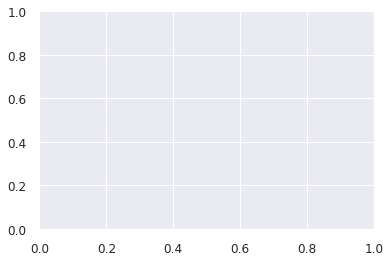

In [141]:
from sklearn.cluster import KMeans
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
#!conda install -c districtdatalabs yellowbrick -y
#from yellowbrick.cluster import KElbowVisualizer
toronto_part_clustering = toronto_part.drop('Neighborhood', 1)


error_cost = []

for i in range(3,15):
    KM = KMeans(n_clusters = i, max_iter = 100)
    try:
        KM.fit(toronto_part_clustering)
    except ValueError:
        print("error on line",i)
    
    
    
    
    #calculate squared error for the clustered points
    error_cost.append(KM.inertia_/100)

#plot the K values aganist the squared error cost
plt.plot(range(3,11), error_cost, color='r', linewidth='3')
plt.xlabel('K values')
plt.ylabel('Squared Error (Cost)')
plt.grid(color='white', linestyle='-', linewidth=2)
plt.show()

In [93]:

!conda install -c districtdatalabs yellowbrick -y

from yellowbrick.cluster import KElbowVisualizer


Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.2

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - yellowbrick


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    pytest-5.3.4               |           py36_0         383 KB
    matplotlib-2.2.2           |   py36hb69df0a_2         6.6 MB
    py-1.8.1                   |             py_0          69 KB
    pytest-runner-5.2          |             py_0          13 KB
    yellowbrick-1.0.1          |           py36_0         429 KB  districtdatalabs
    packaging-20.1             |             py_0          34 KB
    certifi-2019.11.28         |           py36_0         156 KB
    sip-4.18.1                 |   py36hf484d3e_

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (10) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return_n_iter=True)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (10) found smaller than n_clusters (12). Possibly due to duplicate points in X.
  return_n_iter=True)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (10) found smaller than n_clusters (13). Possibly due to duplicate points in X.
  return_n_iter=True)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (10) found smaller than n_clusters (14). Possibly due to duplicate points in X.
  return_n_iter=True)


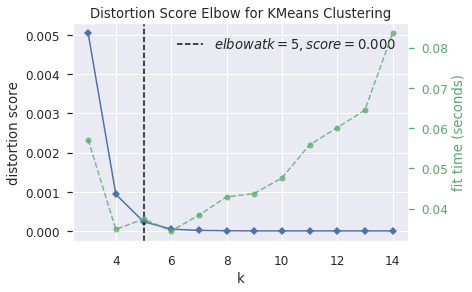

In [118]:
toronto_part_clustering = toronto_part.drop('Neighborhood', 1)
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(3,15))

visualizer.fit(toronto_part_clustering)        # Fit the data to the visualizer
visualizer.show()

Cluster Labels for Toronto dataframe

In [119]:
# set number of clusters
kclusters = 5



# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_part_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_ 

array([4, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 4, 0, 0,
       4, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [120]:
# add clustering labels
toronto_part.insert(0, 'Cluster Labels', kmeans.labels_)
toronto_data.rename(columns = {'Neighbourhood':'Neighborhood'}, inplace = True) 
toronto_merged = toronto_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(toronto_part.set_index('Neighborhood'), on='Neighborhood')
toronto_merged.dropna(subset=["Cluster Labels"], axis=0, inplace=True)
toronto_merged.reset_index(drop=True, inplace=True)
toronto_merged['Cluster Labels'].astype(int)
toronto_merged.head() # check the last columns!

,Postcode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,Indian Restaurant
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353,0.0,0.0
1,M1C,Scarborough,"Highland Creek, Port Union, Rouge Hill",43.784535,-79.160497,0.0,0.0
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,0.0,0.0
3,M1G,Scarborough,Woburn,43.770992,-79.216917,0.0,0.0
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,0.0,0.0


In [38]:
toronto_merged.isnull().sum()

Postcode             0
Borough              0
Neighborhood         0
Latitude             0
Longitude            0
Cluster Labels       0
Indian Restaurant    0
dtype: int64

In [121]:
toronto_merged[toronto_merged["Neighborhood"]=="Thorncliffe Park"]

,Postcode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,Indian Restaurant
38,M4H,East York,Thorncliffe Park,43.705369,-79.349372,2.0,0.111111


<h3>Relationship between neighborhood and Indian population </h3>

We use a Violin plot to see the density of India Resturants in different Borough and Bar char to see number of resturants

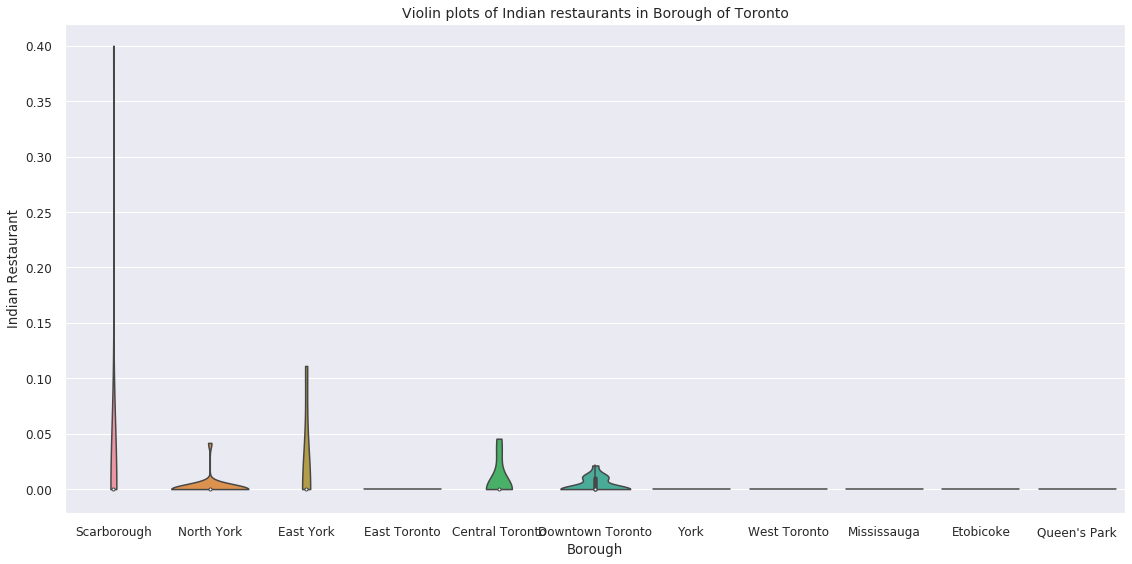

In [122]:
fig = plt.figure(figsize=(19,9))

sns.set(font_scale=1.1)
sns.violinplot(y="Indian Restaurant", x="Borough", data=toronto_merged, cut=0);

plt.title('Violin plots of Indian restaurants in Borough of Toronto', fontsize=14)
plt.show()

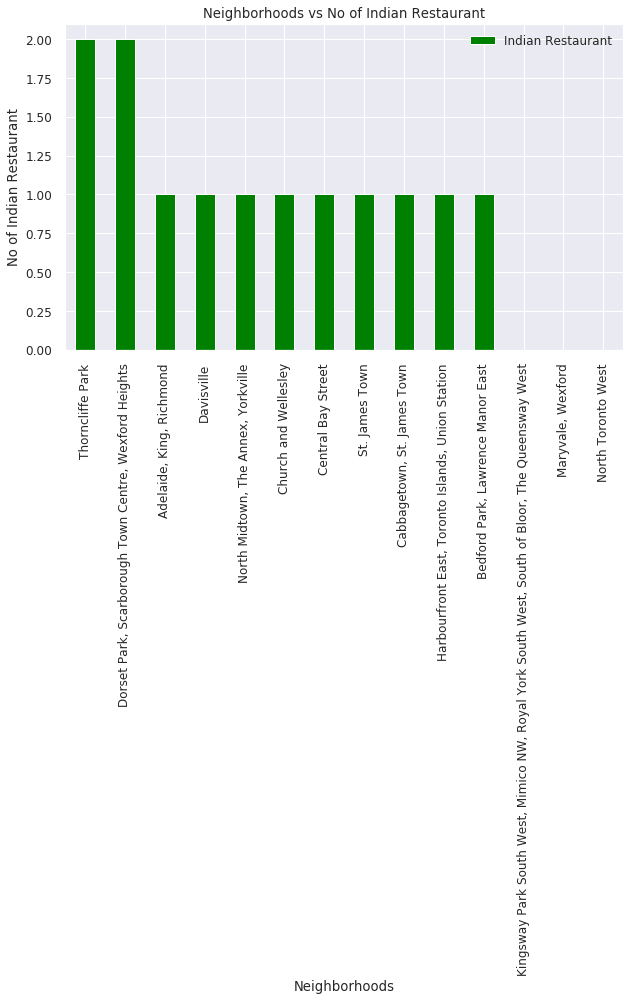

In [46]:
graph = pd.DataFrame(toronto_onehot.groupby('Neighborhood')['Indian Restaurant'].sum())
graph = graph.sort_values(by ='Indian Restaurant', ascending=False)
graph.iloc[:14].plot(kind='bar', figsize=(10,6), color='green')
plt.xlabel("Neighborhoods")
plt.ylabel("No of Indian Restaurant")
plt.title("Neighborhoods vs No of Indian Restaurant")
plt.show()

In [149]:
toronto_merged.sort_values(by='Indian Restaurant',ascending=False).head(12)

,Postcode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,Indian Restaurant
10,M1P,Scarborough,"Dorset Park, Scarborough Town Centre, Wexford ...",43.757410,-79.273304,1.0,0.400000
38,M4H,East York,Thorncliffe Park,43.705369,-79.349372,2.0,0.111111
64,M5R,Central Toronto,"North Midtown, The Annex, Yorkville",43.672710,-79.405678,3.0,0.045455
61,M5M,North York,"Bedford Park, Lawrence Manor East",43.733283,-79.419750,3.0,0.041667
46,M4S,Central Toronto,Davisville,43.704324,-79.388790,3.0,0.029412
50,M4X,Downtown Toronto,"Cabbagetown, St. James Town",43.667967,-79.367675,4.0,0.021277
51,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160,4.0,0.012195
56,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383,4.0,0.012048
54,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,4.0,0.010000
57,M5H,Downtown Toronto,"Adelaide, King, Richmond",43.650571,-79.384568,4.0,0.010000


In [123]:
#Merge all the population table with the ethnic percentage by neighborhood
district = district1.append(district2,sort=True).reset_index()
district.drop('index',axis=1,inplace=True)
district = district.append(district3,sort=True).reset_index()
district.drop('index',axis=1,inplace=True)
district = district.append(district4,sort=True).reset_index()
district.drop('index',axis=1,inplace=True)
district_final = district[['Riding', 'Population','Ethnic Origin #1', 'Ethnic1%','Ethnic Origin #2', 'Ethnic2%',
                               'Ethnic Origin #3','Ethnic3%','Ethnic Origin #4', 'Ethnic4%','Ethnic Origin #5','Ethnic5%', 
                               'Ethnic Origin #6','Ethnic6%','Ethnic Origin #7', 'Ethnic7%','Ethnic Origin #8', 'Ethnic8%',
                               'Ethnic Origin #9','Ethnic9%',
                              ]]
district_final

,Riding,Population,Ethnic Origin #1,Ethnic1%,Ethnic Origin #2,Ethnic2%,Ethnic Origin #3,Ethnic3%,Ethnic Origin #4,Ethnic4%,Ethnic Origin #5,Ethnic5%,Ethnic Origin #6,Ethnic6%,Ethnic Origin #7,Ethnic7%,Ethnic Origin #8,Ethnic8%,Ethnic Origin #9,Ethnic9%
0,Spadina-Fort York,114315,English,16.4,Chinese,16.0,Irish,14.6,Canadian,14.0,Scottish,13.2,French,7.70,German,7.6,NaN,NaN,NaN,NaN
1,Beaches-East York,108435,English,24.2,Irish,19.9,Canadian,19.7,Scottish,18.9,French,8.7,German,8.40,NaN,NaN,NaN,NaN,NaN,NaN
2,Davenport,107395,Portuguese,22.7,English,13.6,Canadian,12.8,Irish,11.5,Italian,11.1,Scottish,11.00,NaN,NaN,NaN,NaN,NaN,NaN
3,Parkdale-High Park,106445,English,22.3,Irish,20.0,Scottish,18.7,Canadian,16.1,German,9.8,French,8.88,Polish,8.5,NaN,NaN,NaN,NaN
4,Toronto-Danforth,105395,English,22.9,Irish,19.5,Scottish,18.7,Canadian,18.4,Chinese,13.8,French,8.86,German,8.8,Greek,7.3,NaN,NaN
5,Toronto-St. Paul's,104940,English,18.5,Canadian,16.1,Irish,15.2,Scottish,14.8,Polish,10.3,German,7.90,Russian,7.7,Italian,7.3,French,7.2
6,University-Rosedale,100520,English,20.6,Irish,16.6,Scottish,16.3,Canadian,15.2,Chinese,14.7,German,8.70,French,7.7,Italian,7.4,NaN,NaN
7,Toronto Centre,99590,English,15.7,Canadian,13.7,Irish,13.4,Scottish,12.6,Chinese,12.5,French,7.20,NaN,NaN,NaN,NaN,NaN,NaN
8,Willowdale,117405,Chinese,25.9,Iranian,12.1,Korean,10.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Eglinton-Lawrence,112925,Canadian,14.7,English,12.6,Polish,12.0,Filipino,11.0,Scottish,9.7,Italian,9.50,Irish,9.2,Russian,8.4,NaN,NaN


View of Indian population data extracted from Wikipedia. Data for 4 major districts was merged and cleaned to only keep Ridding's with Indian population greater than or equal to 7% of the total population

In [124]:
#Filtering the riding with Indian ethnic crowd
temp = district_final.loc[(district_final['Ethnic Origin #1'] == 'East Indian')| 
                                      (district_final['Ethnic Origin #2'] == 'East Indian')|
                                      (district_final['Ethnic Origin #3'] == 'East Indian')|
                                      (district_final['Ethnic Origin #4'] == 'East Indian')|
                                      (district_final['Ethnic Origin #5'] == 'East Indian')|
                                      (district_final['Ethnic Origin #6'] == 'East Indian')|
                                      (district_final['Ethnic Origin #7'] == 'East Indian')|
                                      (district_final['Ethnic Origin #8'] == 'East Indian')|
                                      (district_final['Ethnic Origin #9'] == 'East Indian')]
district_indian = pd.DataFrame(temp).reset_index()
district_indian.drop('index',axis=1,inplace=True)

district_indian

,Riding,Population,Ethnic Origin #1,Ethnic1%,Ethnic Origin #2,Ethnic2%,Ethnic Origin #3,Ethnic3%,Ethnic Origin #4,Ethnic4%,Ethnic Origin #5,Ethnic5%,Ethnic Origin #6,Ethnic6%,Ethnic Origin #7,Ethnic7%,Ethnic Origin #8,Ethnic8%,Ethnic Origin #9,Ethnic9%
0,Don Valley North,109060,Chinese,32.4,East Indian,7.3,Iranian,7.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Humber River-Black Creek,107725,Italian,12.8,East Indian,9.2,Jamaican,8.5,Vietnamese,8.0,Canadian,7.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Don Valley East,93170,East Indian,10.6,Canadian,10.4,English,10.1,Chinese,8.9,Irish,8.1,Scottish,8.0,Filipino,7.8,NaN,NaN,NaN,NaN
3,Scarborough Centre,110450,Filipino,13.1,East Indian,12.2,Canadian,11.2,Chinese,10.7,English,7.8,Sri Lankan,7.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Scarborough Southwest,108295,Canadian,16.2,English,14.3,Irish,11.5,Scottish,10.9,Filipino,9.5,East Indian,8.2,Chinese,7.2,NaN,NaN,NaN,NaN
5,Scarborough-Agincourt,104225,Chinese,47.0,East Indian,7.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Scarborough-Rouge Park,101445,East Indian,16.7,Canadian,11.8,Sri Lankan,11.1,English,9.8,Filipino,9.3,Jamaican,8.4,Scottish,7.2,Irish,7.0,NaN,NaN
7,Scarborough-Guildwood,101115,East Indian,18.0,Canadian,11.6,English,9.7,Filipino,8.5,Sri Lankan,7.8,Chinese,7.1,Scottish,7.0,NaN,NaN,NaN,NaN
8,Scarborough North,97610,Chinese,46.6,East Indian,11.8,Sri Lankan,9.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Etobicoke North,116960,East Indian,22.2,Canadian,7.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [125]:
#retaining only Indian ethnic percentage & the neighborhood name 
columns_list = district_indian.columns.to_list()
district_indian_DF_with_percent = pd.DataFrame()
#removing Riding & Population from the column names list
del columns_list[0]
del columns_list[0]


for i in range(0,district_indian.shape[0]):
    for j in columns_list:
        print(j)
        if district_indian.at[i, j] == 'East Indian':
            k = columns_list.index(j) + 1
            percent_col = columns_list[k]
            district_indian_DF_with_percent = district_indian_DF_with_percent.append({'Riding':district_indian.at[i, 'Riding'], 'Population':district_indian.at[i, 'Population']
                                                                           , 'Ethnicity': district_indian.at[i, j], 'Percentage': district_indian.at[i, percent_col]},ignore_index=True)

district_indian_DF_with_percent      

Ethnic Origin #1
Ethnic1%
Ethnic Origin #2
Ethnic2%
Ethnic Origin #3
Ethnic3%
Ethnic Origin #4
Ethnic4%
Ethnic Origin #5
Ethnic5%
Ethnic Origin #6
Ethnic6%
Ethnic Origin #7
Ethnic7%
Ethnic Origin #8
Ethnic8%
Ethnic Origin #9
Ethnic9%
Ethnic Origin #1
Ethnic1%
Ethnic Origin #2
Ethnic2%
Ethnic Origin #3
Ethnic3%
Ethnic Origin #4
Ethnic4%
Ethnic Origin #5
Ethnic5%
Ethnic Origin #6
Ethnic6%
Ethnic Origin #7
Ethnic7%
Ethnic Origin #8
Ethnic8%
Ethnic Origin #9
Ethnic9%
Ethnic Origin #1
Ethnic1%
Ethnic Origin #2
Ethnic2%
Ethnic Origin #3
Ethnic3%
Ethnic Origin #4
Ethnic4%
Ethnic Origin #5
Ethnic5%
Ethnic Origin #6
Ethnic6%
Ethnic Origin #7
Ethnic7%
Ethnic Origin #8
Ethnic8%
Ethnic Origin #9
Ethnic9%
Ethnic Origin #1
Ethnic1%
Ethnic Origin #2
Ethnic2%
Ethnic Origin #3
Ethnic3%
Ethnic Origin #4
Ethnic4%
Ethnic Origin #5
Ethnic5%
Ethnic Origin #6
Ethnic6%
Ethnic Origin #7
Ethnic7%
Ethnic Origin #8
Ethnic8%
Ethnic Origin #9
Ethnic9%
Ethnic Origin #1
Ethnic1%
Ethnic Origin #2
Ethnic2%
Ethnic Origi

,Ethnicity,Percentage,Population,Riding
0,East Indian,7.3,109060.0,Don Valley North
1,East Indian,9.2,107725.0,Humber River-Black Creek
2,East Indian,10.6,93170.0,Don Valley East
3,East Indian,12.2,110450.0,Scarborough Centre
4,East Indian,8.2,108295.0,Scarborough Southwest
5,East Indian,7.4,104225.0,Scarborough-Agincourt
6,East Indian,16.7,101445.0,Scarborough-Rouge Park
7,East Indian,18.0,101115.0,Scarborough-Guildwood
8,East Indian,11.8,97610.0,Scarborough North
9,East Indian,22.2,116960.0,Etobicoke North


In [126]:
district_indian_DF_with_percent['Indian Population'] = (district_indian_DF_with_percent['Percentage'] * district_indian_DF_with_percent['Population'])/100
district_indian_DF_with_percent.drop(columns={'Percentage','Population','Ethnicity'},axis=1, inplace =True)
district_indian_DF_with_percent.drop_duplicates(keep='first',inplace=True) 
district_indian_DF_with_percent


,Riding,Indian Population
0,Don Valley North,7961.380
1,Humber River-Black Creek,9910.700
2,Don Valley East,9876.020
3,Scarborough Centre,13474.900
4,Scarborough Southwest,8880.190
5,Scarborough-Agincourt,7712.650
6,Scarborough-Rouge Park,16941.315
7,Scarborough-Guildwood,18200.700
8,Scarborough North,11517.980
9,Etobicoke North,25965.120


Graph for population across different neighborhoods shows that Etobicoke and Scarborough neighborhoods have the highest number of Indian population. Identifying these neighborhoods help us get an idea of a customer base in each of these places. Keeping this in mind when we do clustering of Indian restaurants, it will be ideal to select a neighborhood with higher Indian population and least number of Indian restaurants

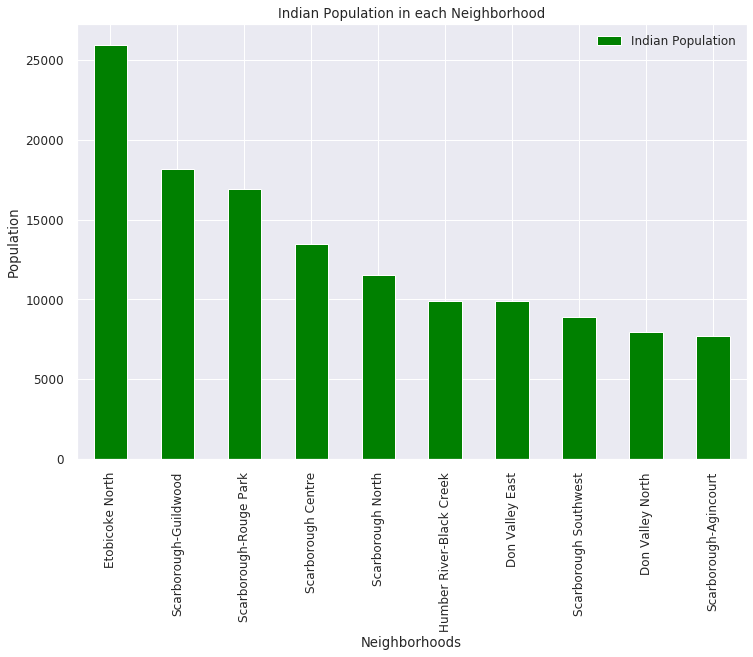

In [128]:
bar_graph = district_indian_DF_with_percent.sort_values(by='Indian Population', ascending=False)
bar_graph.plot(kind='bar',x='Riding', y='Indian Population',figsize=(12,8), color='green')
plt.title("Indian Population in each Neighborhood")
plt.xlabel("Neighborhoods")
plt.ylabel("Population")
plt.show()

<h3>Relationship between Indian Restaurants and Indian population </h3>

In order to do this analysis I had to join the neighborhoods data from Foursquare and the Indian population data from Wikipedia. After joining it was noticed that the data from two sources was inconsistent and so the joined data was inaccurate to correctly understand the relationship. Foursquare data was latest while population data from Wikipedia was from 2016 census and so joining them based on neighborhood names was not feasible. This is can one of the future prospects to strengthen this analysis.

In [129]:
#Altering the list to match the wikipedia page so we can retrieve the neighborhoods present in those Ridings
riding_list = district_indian_DF_with_percent['Riding'].to_list()
riding_list[riding_list.index('Scarborough Centre')] = 'Scarborough Centre (electoral district)'
riding_list[riding_list.index('Scarborough North')] = 'Scarborough North (electoral district)'
riding_list

['Don Valley North',
 'Humber River-Black Creek',
 'Don Valley East',
 'Scarborough Centre (electoral district)',
 'Scarborough Southwest',
 'Scarborough-Agincourt',
 'Scarborough-Rouge Park',
 'Scarborough-Guildwood',
 'Scarborough North (electoral district)',
 'Etobicoke North']

In [130]:
import wikipedia

Riding_neighborhood_df = pd.DataFrame()

for item in riding_list:
    section = wikipedia.WikipediaPage(item).section('Geography')
    start = section.index('neighbourhoods of') + 17
    stop = section.index('.',start)
    Riding_neighborhood_df = Riding_neighborhood_df.append({'Riding':item, 'Neighborhoods':section[start:stop]},ignore_index=True)
    

Riding_neighborhood_df = Riding_neighborhood_df[['Riding','Neighborhoods']]
Riding_neighborhood_df

ModuleNotFoundError: No module named 'wikipedia'

In [180]:
#Merging the pop_indian_DF_with_percent dataframe containing population information with the Riding_neighborhood_df dataframe.

Neigh_pop = pd.merge(district_indian_DF_with_percent, Riding_neighborhood_df, on='Riding')

Neigh_pop.drop(columns=['Riding'],inplace =True)
Neigh_pop

,Indian Population,Neighborhoods
0,7961.380,"Henry Farm, Bayview Village, Bayview Woods-St..."
1,9910.700,"Humber Summit, Humbermede, Humberlea, York Un..."
2,9876.020,"Flemingdon Park, Don Mills, Graydon Hall, Par..."
3,8880.190,"Birch Cliff, Oakridge, Cliffside, Kennedy Par..."
4,7712.650,"Steeles, L'Amoreaux, Tam O'Shanter-Sullivan, ..."
5,16941.315,"Morningside Heights, Rouge, Port Union, West ..."
6,18200.700,"Guildwood, West Hill (west of Morningside Ave..."
7,25965.120,"The Elms, Humberwood, Kingsview Village, This..."


In [181]:
Neigh_pop.rename(columns={'Indian Population':'Population'},inplace = True)
Neigh_pop = pd.DataFrame(Neigh_pop.Neighborhoods.str.split(',').tolist(), index=Neigh_pop.Population).stack().reset_index()
Neigh_pop.rename(columns={Neigh_pop.columns[2]:'Neighborhood'},inplace = True)
Neigh_pop.drop(columns='level_1',axis=1, inplace =True)
Neigh_pop

,Population,Neighborhood
0,7961.380,Henry Farm
1,7961.380,Bayview Village
2,7961.380,Bayview Woods-Steeles
3,7961.380,Hillcrest Village
4,7961.380,Don Valley Village
5,7961.380,and Pleasant View
6,9910.700,Humber Summit
7,9910.700,Humbermede
8,9910.700,Humberlea
9,9910.700,York University Heights


In [182]:
Neigh_pop['Neighborhood']=Neigh_pop['Neighborhood'].str.replace("\s*\(.*\)\s*","")
Neigh_pop['Neighborhood']=Neigh_pop['Neighborhood'].str.replace("\s*and\s*","")
Neigh_pop

,Population,Neighborhood
0,7961.380,Henry Farm
1,7961.380,Bayview Village
2,7961.380,Bayview Woods-Steeles
3,7961.380,Hillcrest Village
4,7961.380,Don Valley Village
5,7961.380,Pleasant View
6,9910.700,Humber Summit
7,9910.700,Humbermede
8,9910.700,Humberlea
9,9910.700,York University Heights


In [131]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [135]:
#toronto_merged.loc[toronto_merged['Cluster Labels'] == 0]
toronto_merged.head()

,Postcode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,Indian Restaurant
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353,0.0,0.0
1,M1C,Scarborough,"Highland Creek, Port Union, Rouge Hill",43.784535,-79.160497,0.0,0.0
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,0.0,0.0
3,M1G,Scarborough,Woburn,43.770992,-79.216917,0.0,0.0
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,0.0,0.0


<h3>Examine the Clusters:</h3>

In [ ]:
Cluster 1 shows Borough with highest number of Indian resturants whereas cluster 0 shows list of Boroughs where indian Restaurants are absent.

In [136]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0]

,Postcode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,Indian Restaurant
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353,0.0,0.0
1,M1C,Scarborough,"Highland Creek, Port Union, Rouge Hill",43.784535,-79.160497,0.0,0.0
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,0.0,0.0
3,M1G,Scarborough,Woburn,43.770992,-79.216917,0.0,0.0
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,0.0,0.0
...,...,...,...,...,...,...,...
96,M9N,York,Weston,43.706876,-79.518188,0.0,0.0
97,M9P,Etobicoke,Westmount,43.696319,-79.532242,0.0,0.0
98,M9R,Etobicoke,"Kingsview Village, Martin Grove Gardens, Richv...",43.688905,-79.554724,0.0,0.0
99,M9V,Etobicoke,"Albion Gardens, Beaumond Heights, Humbergate, ...",43.739416,-79.588437,0.0,0.0


In [137]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1]

,Postcode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,Indian Restaurant
10,M1P,Scarborough,"Dorset Park, Scarborough Town Centre, Wexford ...",43.75741,-79.273304,1.0,0.4


In [138]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2]

,Postcode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,Indian Restaurant
38,M4H,East York,Thorncliffe Park,43.705369,-79.349372,2.0,0.111111


In [139]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3]

,Postcode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,Indian Restaurant
46,M4S,Central Toronto,Davisville,43.704324,-79.388790,3.0,0.029412
61,M5M,North York,"Bedford Park, Lawrence Manor East",43.733283,-79.419750,3.0,0.041667
64,M5R,Central Toronto,"North Midtown, The Annex, Yorkville",43.672710,-79.405678,3.0,0.045455


In [140]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4]

,Postcode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,Indian Restaurant
50,M4X,Downtown Toronto,"Cabbagetown, St. James Town",43.667967,-79.367675,4.0,0.021277
51,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160,4.0,0.012195
54,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,4.0,0.010000
56,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383,4.0,0.012048
57,M5H,Downtown Toronto,"Adelaide, King, Richmond",43.650571,-79.384568,4.0,0.010000
58,M5J,Downtown Toronto,"Harbourfront East, Toronto Islands, Union Station",43.640816,-79.381752,4.0,0.010000


<h3>5. Results</h3>

<li> Downtown & Central Toronto, East & North Yourk and Scarborough are the neighborhoods with Indian restaurants. </li>

<li> Most of Scarborough and Etobicoke ridings are the top ridings with Indian population. </li>

<li> Cluster 0 gives us all the neighborhoods which are missing an Indian restaurant. </li>


<h3>6. Discussion</h3>

From the results I think Etobicoke North is the best place to open up an Indian restuarant. The reason for this is that it has the highest number of Indian population among all neighborhoods and it also belongs to Cluster 0 suggesting that there are no Indian restaurants in that area. The large customer base and absence of any competitors is the perfect environment for opening a new business. However I think there are other metrics that should be considered before making a final decision. First would be to use latest data for population distribution taking into account the resent surge of immigrants to Canada in past few years as the Wiki data for population is from 2016. I would also like to consider cost/sqft for properties in these neighborhoods to understand if the business is going to make a profit.

<h3>7. Conclusion</h3>

I would like to conclude saying this project gave me my first experience of working with real life data and applying the data science methodologies that I had learned in previous courses. For this project I learned how important is to validate the data at data cleaning phase so that you can drawn meaningful conclusions and also understood the impact of meaningless data on analysis.